<h1 style="color:#8B0000;font-size:26px">SEER Brain and Lung Cancer Data Analysis</h1>

<h3 style="color:#008000;font-size:23px">:::::Import All the necessary libraries:::::</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#LogisticRegression
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

<h3 style="color:#008000;font-size:23px"> :::::Load The Data:::::</h3>

<h3 style="color:#8B0000;"> Import and Read the Data set:</h3>

In [2]:
df_main = pd.read_excel("D:/SRm 4th sem/cancer data analysis/new dataset/SEER Cancer.xlsx")

In [3]:
df = df_main.copy()
print("Shape of df :",df.shape)
df.head(8)

Shape of df : (193481, 17)


,Patient ID,Year of diagnosis,Age,Sex,Marital status,Site recode,Primary Site,Laterality,Summary Stage,Reason,Radiation,Chemotherapy,Tumor Size,Metastasis,Survival months,diagnosis to treatment,Vital status
0,661,2018,66 years,Male,Divorced,Lung and Bronchus,"C34.1-Upper lobe, lung",Right - origin of primary,Regional,Surgery performed,None/Unknown,Yes,T3,M0,47,58,Alive
1,1040,2020,76 years,Male,Single (never married),Brain,C71.4-Occipital lobe,Right - origin of primary,Localized,Surgery performed,Beam radiation,Yes,88,88,12,0,Alive
2,1405,2020,66 years,Female,Single (never married),Lung and Bronchus,"C34.1-Upper lobe, lung",Right - origin of primary,Localized,Not recommended,None/Unknown,No/Unknown,T2a,M0,12,45,Dead
3,1863,2020,58 years,Female,Married (including common law),Lung and Bronchus,"C34.1-Upper lobe, lung",Right - origin of primary,Localized,Not recommended,Beam radiation,No/Unknown,T2a,M0,16,148,Alive
4,2393,2019,68 years,Male,Married (including common law),Lung and Bronchus,"C34.9-Lung, NOS","Paired site, but no information concerning lat...",Distant,Not recommended,None/Unknown,Yes,TX,M1b,5,57,Dead
5,2826,2021,77 years,Female,Married (including common law),Lung and Bronchus,"C34.1-Upper lobe, lung",Right - origin of primary,Localized,Surgery performed,None/Unknown,No/Unknown,T1c,M0,4,36,Alive
6,3576,2021,56 years,Female,Married (including common law),Lung and Bronchus,"C34.3-Lower lobe, lung",Right - origin of primary,Regional,Not recommended,None/Unknown,Yes,T1b,M0,8,55,Alive
7,6440,2021,79 years,Female,Divorced,Lung and Bronchus,"C34.2-Middle lobe, lung",Right - origin of primary,Distant,Not recommended,Beam radiation,Yes,T4,M0,7,15,Alive


In [4]:
df1 = df.drop(df.index[10000:193480])

In [5]:
print("Shape of df1 :",df1.shape)

Shape of df1 : (10001, 17)


In [6]:
df1.columns

Index(['Patient ID', 'Year of diagnosis', 'Age', 'Sex', 'Marital status',
       'Site recode', 'Primary Site', 'Laterality', 'Summary Stage', 'Reason',
       'Radiation', 'Chemotherapy', 'Tumor Size', 'Metastasis',
       'Survival months', 'diagnosis to treatment', 'Vital status'],
      dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10001 entries, 0 to 193480
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Patient ID              10001 non-null  int64 
 1   Year of diagnosis       10001 non-null  int64 
 2   Age                     10001 non-null  object
 3   Sex                     10001 non-null  object
 4   Marital status          10001 non-null  object
 5   Site recode             10001 non-null  object
 6   Primary Site            10001 non-null  object
 7   Laterality              10001 non-null  object
 8   Summary Stage           9994 non-null   object
 9   Reason                  10001 non-null  object
 10  Radiation               10001 non-null  object
 11  Chemotherapy            10001 non-null  object
 12  Tumor Size              10001 non-null  object
 13  Metastasis              10001 non-null  object
 14  Survival months         10001 non-null  object
 15  d

In [8]:
df1.shape

(10001, 17)

In [9]:
df1.isna().sum().sum()

7


<h3 style="color:#008000;font-size:23px"> :::::Preprocessing the Data:::::</h3>

<h3 style="color:#8B0000;"> Drop Duplicates from the data:</h3>

In [10]:
df1.duplicated().sum()

5

In [11]:
df1 = df1.drop_duplicates()


<h3 style="color:#8B0000;"> Remove the string from age column:</h3>


In [12]:
df1['Age'] = df1['Age'].str.replace(' years', '', regex=False)

# Convert Age column to integers
df1['Age'] = df1['Age'].astype(int)


<h3 style="color:#8B0000;"> Checking for anomalies in 'Survival months' and 'diagnosis to treatment' attributes 
and imputing null values simultaneously:</h3>

In [13]:
df1['Survival months'].unique()

array([47, 12, 16, 5, 4, 8, 7, 21, 3, 0, 34, 38, 10, 26, 25, 1, 14, 39,
       30, 2, 32, 9, 33, 22, 42, 17, 15, 27, 11, 18, 28, 6, 19, 24, 40,
       46, 44, 31, 20, 35, 36, 13, 37, 45, 41, 23, 29, 43, 'Unknown'],
      dtype=object)

In [14]:
valid_cat_counts3 = df1[df1['Survival months'] != 'Unknown']
category_counts3 = valid_cat_counts3['Survival months'].value_counts(normalize=True)

# Create a function to randomly assign 'np.nan' values based on the distribution

def assign_unknown3(row):
    if row == 'Unknown':
        return np.random.choice(category_counts3.index, p=category_counts3.values)
    return row

# Apply the function to the 'Category' column
df1['Survival months'] = df1['Survival months'].apply(assign_unknown3)

In [15]:
df1['diagnosis to treatment'].unique()

array([58, 0, 45, 148, 57, 36, 55, 15, 49, 19, 38, 'Unable to calculate',
       246, 52, 34, 12, 8, 25, 33, 17, 1, 60, 75, 29, 21, 30, 54, 88, 10,
       6, 84, 39, 156, 18, 26, 67, 51, 59, 20, 69, 22, 24, 32, 133, 23, 3,
       28, 105, 13, 74, 5, 48, 98, 42, 40, 16, 126, 294, 56, 35, 72, 2,
       102, 78, 61, 124, 43, 53, 97, 70, 50, 63, 14, 76, 41, 37, 82, 149,
       31, 80, 46, 83, 7, 71, 62, 283, 27, 77, 103, 65, 297, 217, 150,
       169, 104, 66, 132, 44, 134, 165, 172, 64, 135, 168, 81, 11, 89, 86,
       101, 47, 160, 93, 4, 189, 194, 85, 128, 131, 73, 68, 79, 177, 143,
       99, 221, 236, 151, 108, 192, 243, 91, 9, 96, 112, 130, 113, 117,
       284, 111, 140, 180, 127, 141, 110, 116, 154, 90, 147, 157, 166, 94,
       106, 269, 512, 158, 95, 161, 248, 208, 87, 272, 109, 92, 121, 250,
       153, 290, 235, 175, 186, 298, 173, 159, 210, 257, 179, 120, 142,
       122, 182, 107, 321, 171, 384, 213, 123, 239, 139, 138, 202, 237,
       238, 423, 145, 193, 218, 207, 228, 115,

In [16]:
df1['diagnosis to treatment'] = df1['diagnosis to treatment'].replace('731+ days', 731)

In [17]:
valid_cat_counts = df1[df1['diagnosis to treatment'] != 'Unable to calculate']
category_counts = valid_cat_counts['diagnosis to treatment'].value_counts(normalize=True)

# Create a function to randomly assign 'Unable to calculate' values based on the distribution

def assign_unknown(row):
    if row == 'Unable to calculate':
        return np.random.choice(category_counts.index, p=category_counts.values)
    return row

# Apply the function to the 'Category' column
df1['diagnosis to treatment'] = df1['diagnosis to treatment'].apply(assign_unknown)


<h3 style="color:#8B0000;"> Imputing null values in 'Tumor Size' and 'Metastasis' attribute:</h3>


In [18]:
valid_cat_counts1 = df1[df1['Tumor Size'] != 88]
category_counts1 = valid_cat_counts1['Tumor Size'].value_counts(normalize=True)

# Create a function to randomly assign '88' values based on the distribution

def assign_unknown1(row):
    if row == 88:
        return np.random.choice(category_counts1.index, p=category_counts1.values)
    return row

# Apply the function to the 'Category' column
df1['Tumor Size'] = df1['Tumor Size'].apply(assign_unknown1)

In [19]:
valid_cat_counts2 = df1[df1['Metastasis'] != 88]
category_counts2 = valid_cat_counts2['Metastasis'].value_counts(normalize=True)

# Create a function to randomly assign '88' values based on the distribution

def assign_unknown2(row):
    if row == 88:
        return np.random.choice(category_counts2.index, p=category_counts2.values)
    return row

# Apply the function to the 'Category' column
df1['Metastasis'] = df1['Metastasis'].apply(assign_unknown2)


<h3 style="color:#8B0000;"> Simplifying categorical data in 'Marital status', 'Laterality', 'Summary Stage'and 'Radiation' attributes:</h3>


In [20]:
df1['Marital status'] = df1['Marital status'].replace('Unknown', 'Widowed')
df1['Marital status'] = df1['Marital status'].replace('Separated', 'Divorced')
df1['Marital status'] = df1['Marital status'].replace('Unmarried or Domestic Partner', 'Single (never married)')
df1['Marital status'] = df1['Marital status'].replace('Single (never married)', 'Single')
df1['Marital status'] = df1['Marital status'].replace('Married (including common law)', 'Married')

In [21]:
df1['Laterality'] = df1['Laterality'].replace('Right - origin of primary', 'Right')
df1['Laterality'] = df1['Laterality'].replace('Left - origin of primary', 'Left')
df1['Laterality'] = df1['Laterality'].replace('Paired site, but no information concerning laterality', 'Paired site')
df1['Laterality'] = df1['Laterality'].replace('Bilateral, single primary', 'Bilateral')
df1['Laterality'] = df1['Laterality'].replace('Only one side - side unspecified', 'Left')
df1['Laterality'] = df1['Laterality'].replace('Paired site: midline tumor', 'Paired site')

In [22]:
df1['Summary Stage'] = df1['Summary Stage'].replace('In situ', 'Unknown/unstaged')
df1['Summary Stage'] = df1['Summary Stage'].replace('Unknown/unstaged', 'Unstaged')

In [23]:
df1['Radiation'] = df1['Radiation'].replace([
    'None/Unknown', 'Beam radiation', 'Refused (1988+)',
    'Recommended, unknown if administered', 'Radiation, NOS  method or source not specified',
    'Radioactive implants (includes brachytherapy) (1988+)', 
    'Combination of beam with implants or isotopes', 'Radioisotopes (1988+)'],
    
    ['None', 'Beam radiation', 'Refused', 
     'Recommended, unknown if administered', 'Radiation',
     'Radioactive implants', 'beam with implants or isotopes', 'Radioisotopes'])

In [24]:
df1['Primary Site'] = df1['Primary Site'].replace([
    'C34.1-Upper lobe, lung', 'C71.4-Occipital lobe', 'C34.9-Lung, NOS',
    'C34.3-Lower lobe, lung', 'C34.2-Middle lobe, lung', 'C71.5-Ventricle, NOS',
    'C71.1-Frontal lobe', 'C71.8-Overlapping lesion of brain',
    'C71.9-Brain, NOS', 'C34.0-Main bronchus', 'C71.3-Parietal lobe',
    'C71.0-Cerebrum', 'C71.6-Cerebellum, NOS', 'C71.2-Temporal lobe',
    'C34.8-Overlapping lesion of lung', 'C71.7-Brain stem'],
    
    ['Upper lobe, lung', 'Occipital lobe', 'Lung, NOS', 
     'Lower lobe, lung', 'Middle lobe, lung', 'Ventricle, NOS',
     'Frontal lobe', 'Overlapping lesion', 'Brain, NOS',
    'Main bronchus', 'Parietal lobe', 'Cerebrum', 'Cerebellum, NOS',
    'Temporal lobe', 'Overlapping lesion of lung', 'Brain stem'])

In [25]:
df1['Reason'] = df1['Reason'].replace([
    'Surgery performed', 'Not recommended',
    'Not recommended, contraindicated due to other cond; autopsy only (1973-2002)',
    'Recommended but not performed, patient refused',
    'Recommended, unknown if performed',
    'Not performed, patient died prior to recommended surgery',
    'Unknown; death certificate; or autopsy only (2003+)',
    'Recommended but not performed, unknown reason'],
    
    ['Surgery performed', 'Not recommended', 'Not recommended, contraindicated', 
     'Recommended but patient refused', 'Recommended, unknown if performed',
     'Not performed, patient died', 'Unknown', 'Recommended but not performed'])

In [26]:
df1['Chemotherapy'] = df1['Chemotherapy'].replace('No/Unknown', 'No')


<h3 style="color:#8B0000;"> Use only data points that have information in the column "Summary Stage":</h3>


In [27]:
df1['Summary Stage'].isnull().sum()

7

In [28]:
df1 = df1[df1['Summary Stage'].notnull()]


<h3 style="color:#8B0000;"> Typecasting specific columns :</h3>


In [29]:
df1['Patient ID'] = df1['Patient ID'].astype(str)
df1['Vital status'] = df1['Vital status'].astype('category')


<h3 style="color:#8B0000;"> Checking for imbalance in the target column 'Vital status' :</h3>


In [30]:
# Are the groups unbalanced?
distribution = df1['Vital status'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio1 = distribution['Alive'] / df1.shape[0]
imbalance_ratio2 = distribution['Dead'] / df1.shape[0]

# Display the distribution and imbalance ratio
print("Distribution:")
print(distribution)
print("Imbalance Ratio Alive: ", imbalance_ratio1)
print("Imbalance Ratio Dead: ", imbalance_ratio2)

# It is not imbalanced, both are nearly equal to 50-50 percent

Distribution:
Alive    5512
Dead     4477
Name: Vital status, dtype: int64
Imbalance Ratio Alive:  0.5518069876864551
Imbalance Ratio Dead:  0.4481930123135449


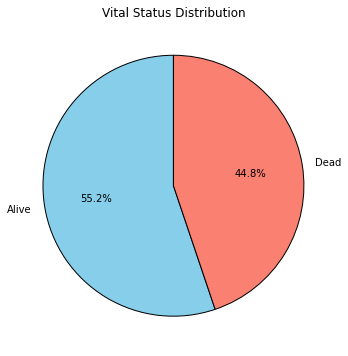

In [31]:
labels = distribution.index  
sizes = distribution.values
colors = ['skyblue', 'salmon']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, 
        startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Vital Status Distribution')
plt.show()


<h3 style="color:#008000;font-size:23px"> :::::Exploratory Data Analysis:::::</h3>


<h3 style="color:#8B0000;"> Histogram for distribution of Year of diagnosis :</h3>


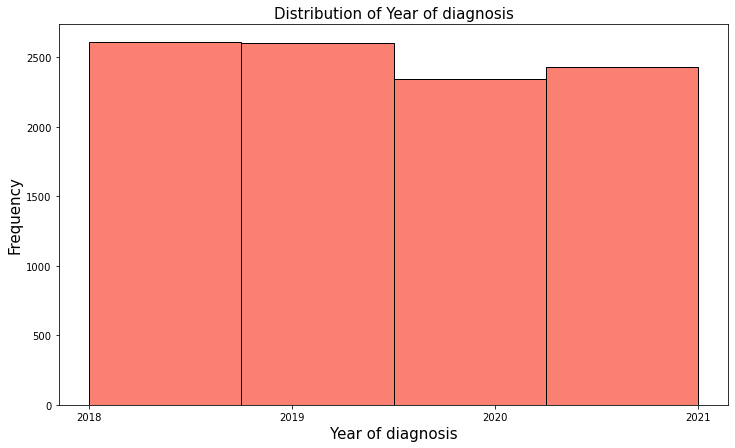

In [32]:
plt.figure(figsize = (12, 7))

sorted_years = sorted(df1['Year of diagnosis'].unique())

plt.hist(df1['Year of diagnosis'], bins=len(sorted_years), color = 'salmon', edgecolor='black')
plt.xticks(sorted_years)
plt.xlabel('Year of diagnosis', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of Year of diagnosis', fontsize = 15)
plt.show()

Explanation: This graph shows the distribution of year of diagnosis of the patients in the dataset. 

Insights: The histogram provides insights into the diagnosis year distribution, which can be helpful in analyzing the number of distribution of patients . It may reveal information about the cohort of patients included in the dataset. Almost equal number of people were diagnosed each year from 2018 to 2021.


<h3 style="color:#8B0000;"> Line Plot for Survival Months vs Count of Patients by Year of Diagnosis:</h3>


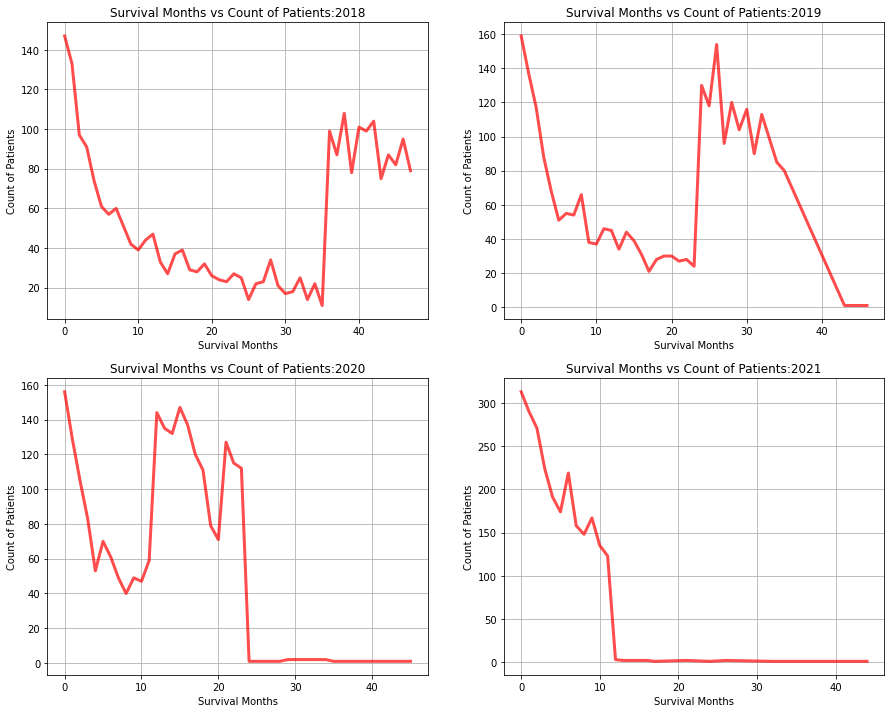

In [33]:
selected_years = [2018, 2019, 2020, 2021]
df1_bar = df1[df1['Year of diagnosis'].isin(selected_years)]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, year in enumerate(selected_years):
    ax = axes[i // 2, i % 2]  # Position in 2x2 grid
    # Get counts of Survival Months for the specific year
    survival_counts = df1_bar[df1_bar['Year of diagnosis'] == year]['Survival months'].value_counts().sort_index()
    survival_counts.plot(kind='line', alpha=0.7, ax=ax, color = 'red', linewidth=3)
    ax.grid(True)
    ax.set_title(f'Survival Months vs Count of Patients:{year}')
    ax.set_xlabel('Survival Months')
    ax.set_ylabel('Count of Patients')

plt.show()

Insights:

We observe a exponential downward graph of number of patients with respect to their survival months (0-10) in every plot.
In the year 2018, the count of patients for more than 34 months survival has a positive growth
In the year 2019, the count of patients for more than 23 months survival has a positive growth
In the year 2020, the count of patients for more than 11 months survival has a positive growth


<h3 style="color:#8B0000;"> Stacked Bar Plot for Distribution of Vital Status by Year of Diagnosis:</h3>


<Figure size 1080x504 with 0 Axes>

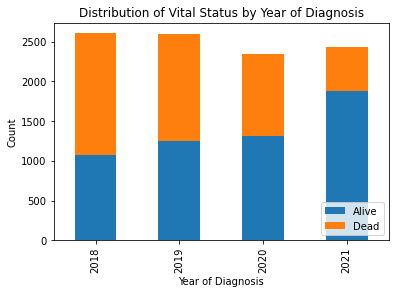

In [34]:
# Create a bar plot showing the count of alive and dead patients for each year
plt.figure(figsize=(15, 7))
df1.groupby(['Year of diagnosis', 'Vital status']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Year of Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Vital Status by Year of Diagnosis')
plt.legend(loc='lower right')
plt.show()

In [35]:
yearly_proportions = df1.groupby('Year of diagnosis')['Vital status'].value_counts(normalize=True).unstack()
print(yearly_proportions)

                      Alive      Dead
Year of diagnosis                    
2018               0.410660  0.589340
2019               0.478879  0.521121
2020               0.559915  0.440085
2021               0.773438  0.226562



<h3 style="color:#8B0000;"> Bar Plot for Count of Cases for each Primary Site:</h3>


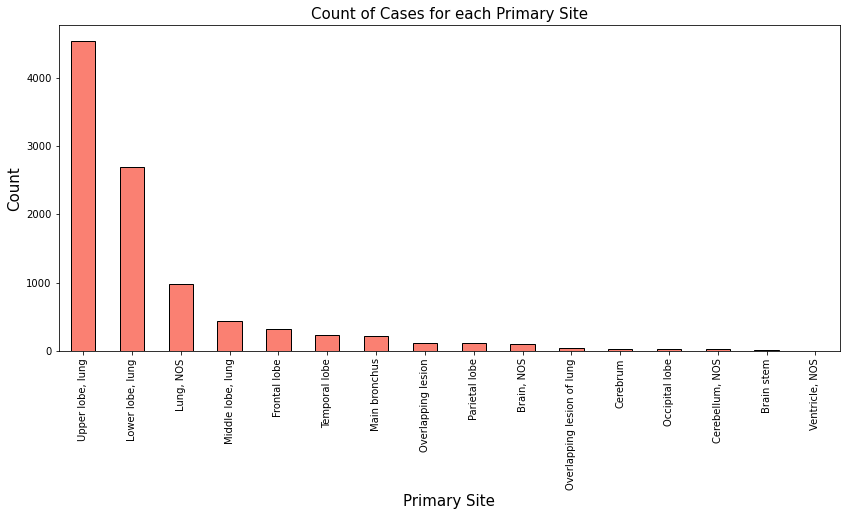

In [36]:
#  Bar chart of 'Primary Site - labeled'
plt.figure(figsize = (14, 6))
df1['Primary Site'].value_counts().plot(kind='bar', color = 'salmon', edgecolor = 'black')
plt.xlabel('Primary Site', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Cases for each Primary Site', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

Explanation: This bar chart represents the count of cases for each primary site (labeled) category. 

Insights: The bar chart helps identify the primary sites with the highest and lowest occurrence of cancer cases. It provides insights into the relative frequencies of different primary sites, allowing for comparisons and highlighting the most common sites. In case of Lungs, Upper Lobe is the primary attack area where as in case of Brain, Frontal Lobe is the primary area of attack.


<h3 style="color:#8B0000;"> Line Plot for Count of Cases wrt Survival months:</h3>


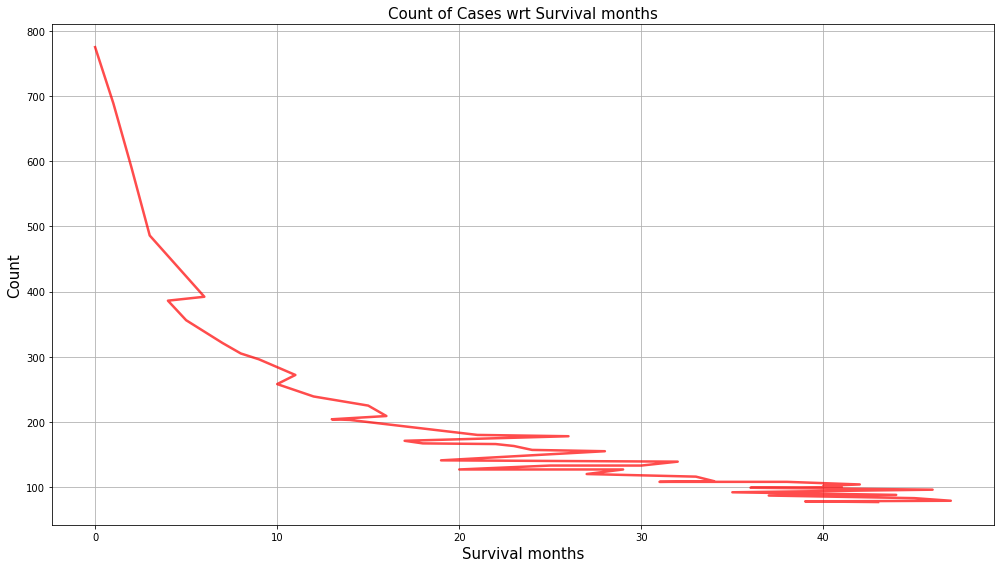

In [37]:
plt.figure(figsize = (14, 8))
df1['Survival months'].value_counts().plot(kind='line', color = 'red', alpha=0.7, linewidth=2.5)
plt.xlabel('Survival months', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Cases wrt Survival months', fontsize = 15)
plt.grid(True)
plt.tight_layout()
plt.show()

Insights:
    
We can observe that the number of patients with respect to the survival months has a high negative correlation.


<h3 style="color:#8B0000;"> Pie Chart for Distribution of Laterality:</h3>


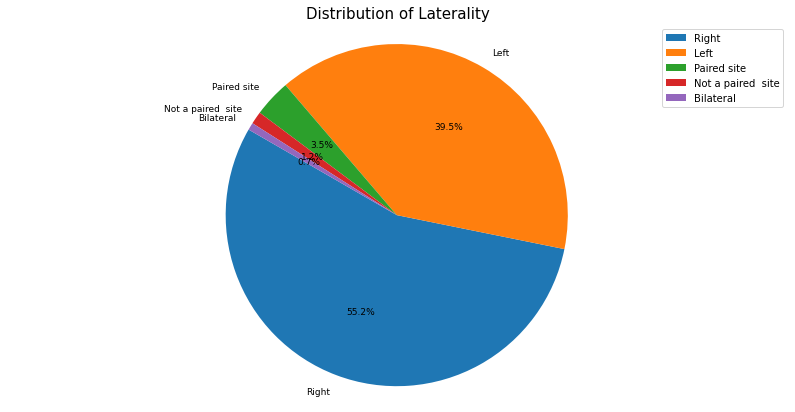

In [38]:
plt.figure(figsize=(14, 7))
labels = df1['Laterality'].value_counts().index
sizes = df1['Laterality'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=150, textprops={'fontsize': 9})
plt.axis('equal')
plt.title('Distribution of Laterality', fontsize = 15)
plt.legend(fontsize=10)
plt.show()

Explanation: This pie chart represents the proportion of cases for each laterality recoded category. Insights: The pie chart offers a visual representation of the relative frequencies of different laterality recoded categories. It allows for a quick assessment of the distribution and comparison between different laterality groups. It can be seen that 53.2% cancers has appeared in right side whereas 38.9% cancers has appeared in left side. A very small percentage of 1% appeared from both the sides that is bilateral.


<h3 style="color:#8B0000;"> Bar plot for Count of Cases for each Summary Stage:</h3>


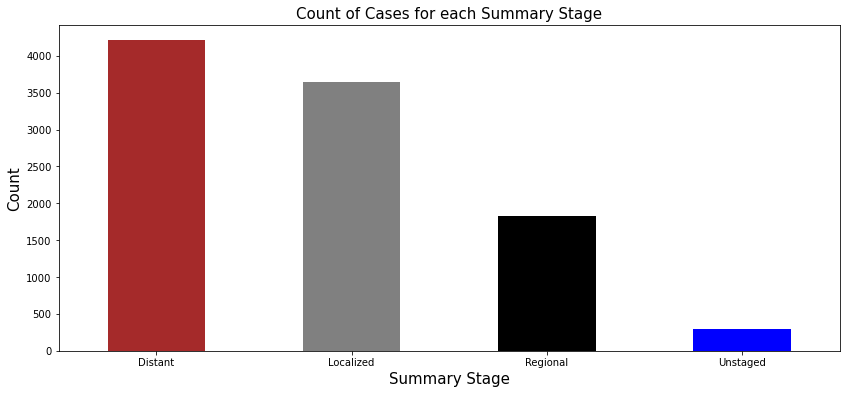

In [39]:
plt.figure(figsize=(14, 6))
df1['Summary Stage'].value_counts().plot(kind='bar', color = ['brown','gray','black','blue'])
plt.xlabel('Summary Stage', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=0)
plt.title('Count of Cases for each Summary Stage', fontsize = 15)
plt.show()

Insights:

The bar graph provides a visual representation of the distribution of cases across different stages. The height of each bar represents the count of cases for the corresponding stage. By analyzing the graph, you can observe the relative frequencies of different stage and identify any imbalances or patterns in the data.

We observe that the nummber of high risk patients(distant cancer) is significantly more than the number of regional stage cancer patients


<h3 style="color:#8B0000;"> Bar plot for Count of Cases for Site Recode:</h3>


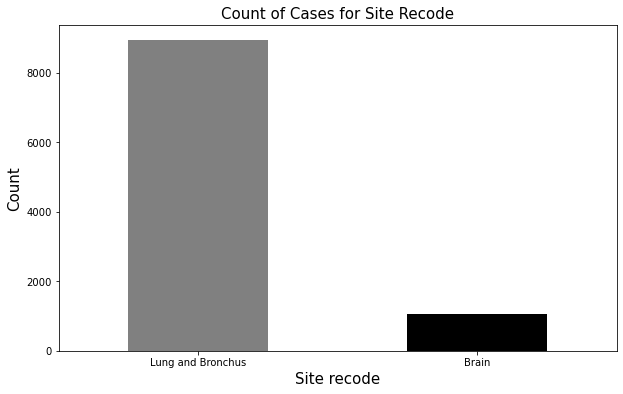

In [40]:
plt.figure(figsize=(10, 6))
df1['Site recode'].value_counts().plot(kind='bar', color = ['gray','black'])
plt.xlabel('Site recode', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=0)
plt.title('Count of Cases for Site Recode', fontsize = 15)
plt.show()

Insights:

There is a data imbalance for site cancers of 'Lungs and Bronchus' and 'Brain'. But this will not affect the accuracy of the data.


<h3 style="color:#8B0000;"> Line plot for Survival Months vs. Age:</h3>


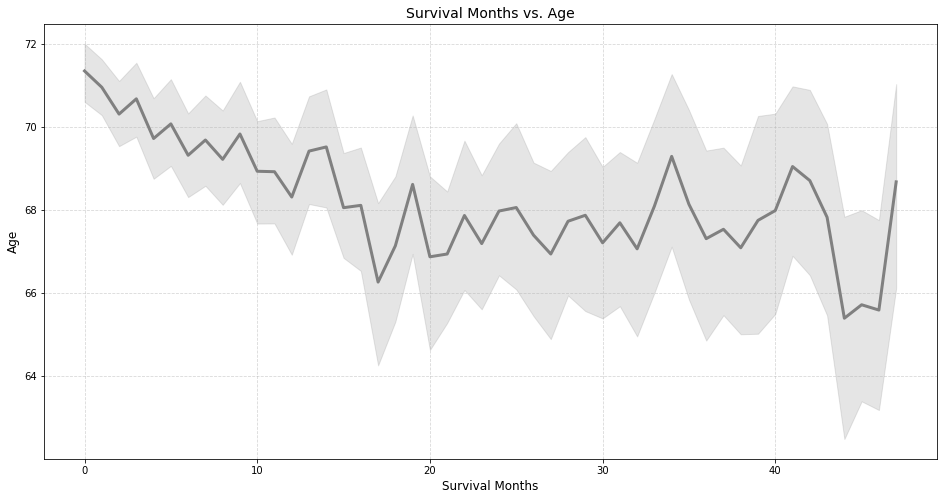

In [41]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='Survival months', y='Age', data=df1, color = 'gray', linewidth=3)
plt.xlabel('Survival Months', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Survival Months vs. Age', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

A negative correlation between Survival months and Age. As survival months increases, age of the patients decreases.


<h3 style="color:#8B0000;"> Line plot for Survival Months vs. Age by Vital Status:</h3>


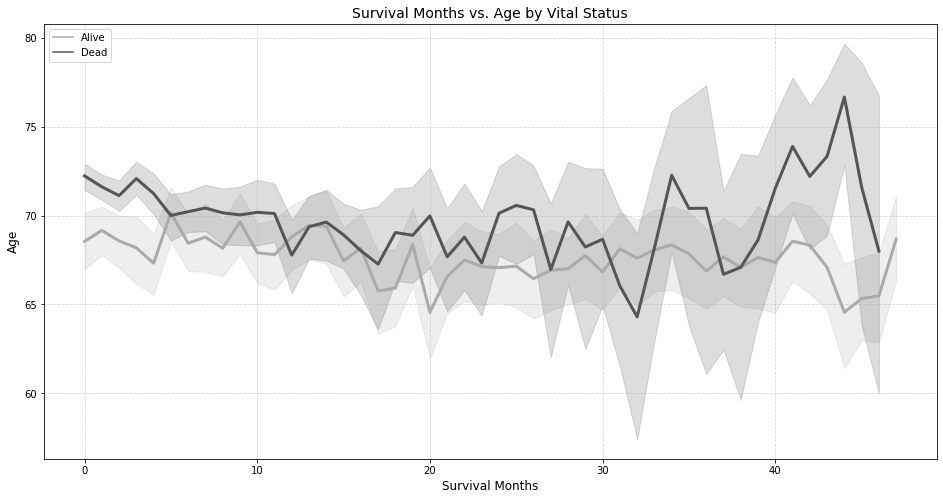

In [42]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='Survival months', y='Age', hue='Vital status', data=df1, palette='binary', linewidth=3)
plt.xlabel('Survival Months', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Survival Months vs. Age by Vital Status', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.show()

Insights:
    
Trend line for alive patients with respect to Survival months vs Age shows a simple straight line which means alive patients show no correlation to Survival months vs Age. On the other hand, for the dead patients, first there is a negative correlation of Survival months vs Age and then at the end, we observe a positive correlation between Survival months and Age which may depict the improvemnt of condition of the patient which helped him to live longer.


<h3 style="color:#8B0000;"> Violin plot for Laterality vs. Age (with Vital Status):</h3>


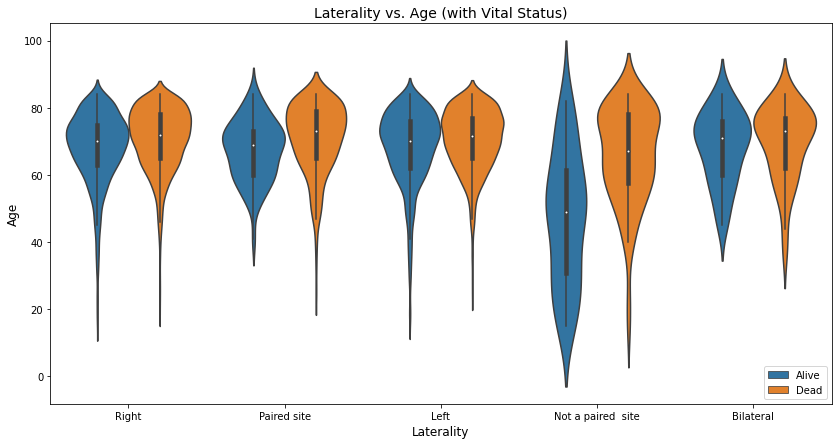

In [43]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Laterality', y='Age', hue='Vital status', data=df1)
plt.xlabel('Laterality', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Laterality vs. Age (with Vital Status)', fontsize=14)
plt.legend(loc='lower right')
plt.show()

Insights: 

Both the alive and the dead patients were equally affected by the cancer's area of attack.

<h3 style="color:#008000;font-size:23px"> :::::Feature Engineering:::::</h3>

In [44]:
# Assuming an average of 30 days per month
df1['Survival days'] = df1['Survival months'] * 30

In [45]:
df1['Surgery Performed'] = df1['Reason'].apply(
    lambda x: 1 if x == 'Surgery performed' else 0)

In [46]:
no_categories = [
    'None','Refused',
    'Recommended, unknown if administered']

# Create a new binary column
df1['Radiation Performed'] = df1['Radiation'].apply(lambda x: 0 if x in no_categories else 1)

# Verify the transformation
print(df1['Radiation Performed'].value_counts())

0    5793
1    4196
Name: Radiation Performed, dtype: int64


In [47]:
df1.drop(['Patient ID','Reason',
         'Survival months','Radiation'], axis = 1, inplace = True)

<h3 style="color:#008000;font-size:23px"> :::::Feature Encoding:::::</h3>

In [48]:
df1['Surgery Performed'] = df1['Surgery Performed'].astype('category').cat.codes
df1['Radiation Performed'] = df1['Radiation Performed'].astype('category').cat.codes
df1['Chemotherapy'] = df1['Chemotherapy'].astype('category').cat.codes
df1['Site recode'] = df1['Site recode'].astype('category').cat.codes
df1['Sex'] = df1['Sex'].astype('category').cat.codes

In [49]:
df1['Vital status'] = df1['Vital status'].cat.codes

In [50]:
df1.select_dtypes(include = 'object').columns

Index(['Marital status', 'Primary Site', 'Laterality', 'Summary Stage',
       'Tumor Size', 'Metastasis'],
      dtype='object')


<h3 style="color:#8B0000;"> Correlation Matrix (with Vital Status):</h3>


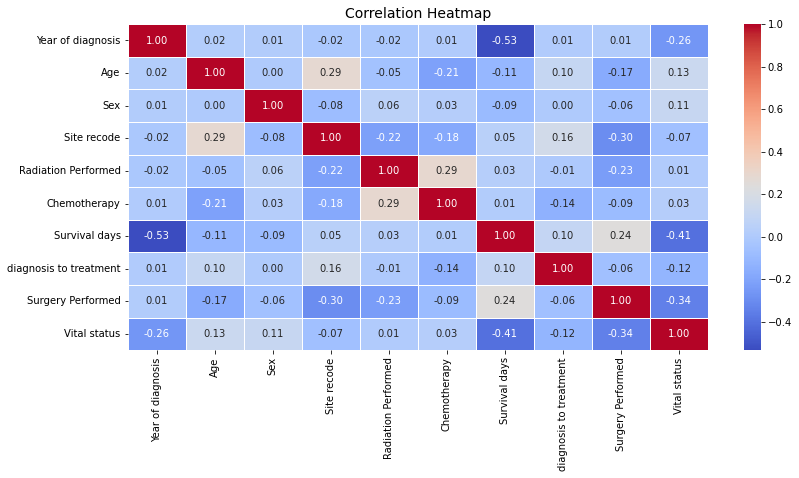

In [51]:
cols2 = ['Year of diagnosis', 'Age', 'Sex', 
         'Marital status', 'Site recode',
         'Radiation Performed', 'Chemotherapy',
       'Survival days', 'diagnosis to treatment', 
         'Surgery Performed', 'Vital status']

df1_corr = df1[cols2]

plt.figure(figsize=(13, 6))
sns.heatmap(df1_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

Insights:

We can observe a few moderately correlated variables

In [52]:
df1_dummy = pd.get_dummies(df1, columns = [
    'Marital status', 'Primary Site', 'Laterality',
    'Summary Stage', 'Tumor Size', 'Metastasis'], drop_first=True)

In [53]:
print(f'Shape: {df1_dummy.shape}')
df1_dummy.head()

Shape: (9989, 54)


,Year of diagnosis,Age,Sex,Site recode,Chemotherapy,diagnosis to treatment,Vital status,Survival days,Surgery Performed,Radiation Performed,...,Tumor Size_T4,Tumor Size_T4a,Tumor Size_T4b,Tumor Size_T4c,Tumor Size_TX,Tumor Size_Tis,Metastasis_M1,Metastasis_M1a,Metastasis_M1b,Metastasis_M1c
0,2018,66,1,1,1,58,0,1410,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,76,1,0,1,0,0,360,1,1,...,0,0,0,0,0,0,0,0,1,0
2,2020,66,0,1,0,45,1,360,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,58,0,1,0,148,0,480,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2019,68,1,1,1,57,1,150,0,0,...,0,0,0,0,1,0,0,0,1,0



<h3 style="color:#008000;font-size:23px"> :::::Feature Selection:::::</h3>

In [54]:
df1_dummycopy = df1_dummy.copy()

In [55]:
df1_dummycopy3 = df1_dummy.copy()


<h3 style="color:#8B0000;"> Implementing Random Forest Classifier from SkLearn to check feature importance:</h3>


In [56]:
X2 = df1_dummycopy3.drop('Vital status', axis=1)
y2 = df1_dummycopy3.pop('Vital status')

In [57]:
model = RandomForestClassifier()
model.fit(X2, y2)
feature_importances = model.feature_importances_

In [58]:
feature_importance = pd.Series(model.feature_importances_, index=X2.columns)
feature_importance.sort_values(ascending=True)

Tumor Size_T4a                             0.000005
Tumor Size_Tis                             0.000050
Tumor Size_T2                              0.000058
Tumor Size_T4b                             0.000085
Tumor Size_T4c                             0.000121
Primary Site_Ventricle, NOS                0.000151
Tumor Size_T1                              0.000331
Primary Site_Cerebellum, NOS               0.000605
Primary Site_Occipital lobe                0.000729
Primary Site_Cerebrum                      0.000741
Primary Site_Overlapping lesion of lung    0.000803
Laterality_Not a paired  site              0.001559
Primary Site_Overlapping lesion            0.001946
Primary Site_Parietal lobe                 0.002163
Primary Site_Brain, NOS                    0.002225
Primary Site_Frontal lobe                  0.002842
Primary Site_Main bronchus                 0.003083
Primary Site_Temporal lobe                 0.003156
Tumor Size_T1mi                            0.003629
Metastasis_M

Random Forest works best for both types of data that is linear and non linear. Hence we are going to use Random Forest for feature selection.

In [59]:
imp_cols = ['Year of diagnosis', 'Age', 'Sex', 'Site recode', 'Chemotherapy',
       'diagnosis to treatment', 'Survival days', 'Surgery Performed',
       'Radiation Performed', 'Marital status_Married',
       'Marital status_Single', 'Marital status_Widowed',
       'Primary Site_Frontal lobe',
       'Primary Site_Lower lobe, lung', 'Primary Site_Lung, NOS',
       'Primary Site_Main bronchus', 'Primary Site_Middle lobe, lung',
       'Primary Site_Temporal lobe', 'Primary Site_Upper lobe, lung',
       'Laterality_Left','Laterality_Paired site',
       'Laterality_Right', 'Summary Stage_Localized', 'Summary Stage_Regional',
       'Summary Stage_Unstaged', 'Tumor Size_T1a',
       'Tumor Size_T1b', 'Tumor Size_T1c', 'Tumor Size_T1mi', 
       'Tumor Size_T2a', 'Tumor Size_T2b', 'Tumor Size_T3', 'Tumor Size_T4',
       'Tumor Size_TX','Metastasis_M1', 'Metastasis_M1a', 'Metastasis_M1b',
       'Metastasis_M1c']

In [60]:
imp_feat_sum = feature_importance[imp_cols].sum()
print(f'The total importance of all the features having feature importance greater than 0.02 is: {round(imp_feat_sum*100,3)}%.')
print(f'Hence we have {round(imp_feat_sum*100,3)}% predictive power which will help in most effective prediction.')

The total importance of all the features having feature importance greater than 0.02 is: 98.843%.
Hence we have 98.843% predictive power which will help in most effective prediction.



<h3 style="color:#8B0000;"> Selecting the best features to provide over 99% predictive power:</h3>


In [61]:
X = df1_dummy.loc[:, imp_cols]
y = df1_dummy['Vital status']

In [62]:
print(f"Shape X --> {X.shape} \nShape y --> {y.shape}")

Shape X --> (9989, 38) 
Shape y --> (9989,)



<h3 style="color:#008000;font-size:23px"> :::::Model Building:::::</h3>


<h3 style="color:#8B0000;"> Splitting data into train and test:</h3>


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [64]:
print(f'X_train shape:{X_train.shape} \nX_test shape:{X_test.shape}') 
print(f'y_train shape:{y_train.shape} \ny_test shape:{y_test.shape}')

X_train shape:(7991, 38) 
X_test shape:(1998, 38)
y_train shape:(7991,) 
y_test shape:(1998,)



<h3 style="color:#8B0000;"> Scaling train and test data:</h3>


In [65]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


<h3 style="color:#8B0000;"> Implementing Stratified K fold to find cross validation scores of different models:</h3>


In [66]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring_metric = make_scorer(accuracy_score)


<h3 style="color:#0000FF;"> Using Random Forest Classifier for Training and validation:</h3>


In [67]:
RF_classifier =  RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state = 42)

cvscore_RF = cross_val_score(RF_classifier, X_train_scaled, y_train, cv=cv, scoring=scoring_metric)

In [68]:
print("Cross-validation scores for Random Forest Classifier model:", np.round(cvscore_RF*100,2))
print("Random Forest Classifier model Mean CV accuracy score:", np.round(np.mean(cvscore_RF*100),2))

Cross-validation scores for Random Forest Classifier model: [89.62 87.92 87.92 89.3  88.8 ]
Random Forest Classifier model Mean CV accuracy score: 88.71



<h3 style="color:#0000FF;"> Using Gradient Boosting Classifier for Training and validation:</h3>


In [69]:
GBC_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                            max_depth=3,    # Depth of each decision tree (weak learners)
                                            random_state=42, subsample=0.8)

cvscore_GBC = cross_val_score(GBC_classifier, X_train_scaled, y_train, cv=cv, scoring=scoring_metric)

In [70]:
print("Cross-validation scores for Gradient Boosting model:", np.round(cvscore_GBC*100,2))
print("Gradient Boosting model Mean CV accuracy score:", np.round(np.mean(cvscore_GBC*100),2))

Cross-validation scores for Gradient Boosting model: [90.87 90.24 89.49 90.61 90.61]
Gradient Boosting model Mean CV accuracy score: 90.36


<h3 style="color:#0000FF;"> Using Adaptive Boost Classifier for Training and validation:</h3>


In [71]:
base_learner = DecisionTreeClassifier(max_depth=3) 
ADC_classifier = AdaBoostClassifier(base_estimator=base_learner, n_estimators=100, learning_rate=0.1, random_state=42)

cvscore_ADC = cross_val_score(ADC_classifier, X_train_scaled, y_train, cv=cv, scoring=scoring_metric)

In [72]:
print("Cross-validation scores for Adaptive Boosting model:", np.round(cvscore_ADC*100,2))
print("Adaptive Boosting model Mean CV accuracy score:", np.round(np.mean(cvscore_ADC*100),2))

Cross-validation scores for Adaptive Boosting model: [90.74 89.61 89.8  90.3  90.43]
Adaptive Boosting model Mean CV accuracy score: 90.18



<h3 style="color:#8B0000;"> Grid Search CV for Hyper parameter Tuning in Gradient Boosting Classifier : </h3>

As gradient boost classifier has the highest mean cross validation score, we are finally going to use this model to predict the outcomes from the test data.

Lets perform hyper parameter tuning using Grid Search Cross Validation method.

In [73]:
GBC_classifier = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GBC_classifier, param_grid, cv=cv, scoring=scoring_metric, n_jobs=-1)

In [74]:
grid_search.fit(X_train_scaled, y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}


In [75]:
best_GBC_classifier = GradientBoostingClassifier(**grid_search.best_params_)
best_GBC_classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(n_estimators=150)



<h1 style="color:#008000;font-size:23px">:::::Model Testing:::::</h1>

<h1 style="color:#0000FF;font-size:20px">Gradient Boosting Classifier for testing on unseen data:</h1>

In [76]:
y_train_pred_GBC = best_GBC_classifier.predict(X_train_scaled) # prediction on train data
train_accu_GBC = accuracy_score(y_train, y_train_pred_GBC)

In [77]:
y_pred_GBC = best_GBC_classifier.predict(X_test_scaled) # prediction on unseen or test data
accu_GBC = accuracy_score(y_test, y_pred_GBC)


<h3 style="color:#8B0000;"> Evaluate the Model using different KPIs (Accuracy, Confusion Matrix, and Classification Report): </h3>

In [78]:
# on train data
print('Train Accuracy GBC Classifier :', np.round(train_accu_GBC*100, 3), '\n')

print('Confusion Matrix GBC Classifier :\n', '\n', confusion_matrix(y_train, y_train_pred_GBC), '\n')

print('Classification Report GBC Classifier :\n', '\n', classification_report(y_train, y_train_pred_GBC))

Train Accuracy GBC Classifier : 91.553 

Confusion Matrix GBC Classifier :
 
 [[4182  198]
 [ 477 3134]] 

Classification Report GBC Classifier :
 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93      4380
           1       0.94      0.87      0.90      3611

    accuracy                           0.92      7991
   macro avg       0.92      0.91      0.91      7991
weighted avg       0.92      0.92      0.92      7991



In [79]:
# on test data or unseen data
print('Test Accuracy GBC Classifier :', np.round(accu_GBC*100, 3), '\n')

print('Confusion Matrix GBC Classifier :\n', '\n', confusion_matrix(y_test, y_pred_GBC), '\n')

print('Classification Report GBC Classifier :\n', '\n', classification_report(y_test, y_pred_GBC))

Test Accuracy GBC Classifier : 89.74 

Confusion Matrix GBC Classifier :
 
 [[1040   92]
 [ 113  753]] 

Classification Report GBC Classifier :
 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1132
           1       0.89      0.87      0.88       866

    accuracy                           0.90      1998
   macro avg       0.90      0.89      0.90      1998
weighted avg       0.90      0.90      0.90      1998



Gradient Boosting Classifier stood out with an accuracy of 89.74% with hyper parameter tuning.


The accuracy represents the proportion of correctly predicted instances in the test data.
The models with higher accuracy values indicate better performance in predicting the vital status.
Based on the accuracy values, the Gradient Boosting Classifier an accuracy score of 90.56%.

It's important to note that accuracy alone might not provide a complete picture of model performance, and other evaluation metrics should be considered as well (e.g., precision, recall, F1-score) to assess the models' overall performance and suitability for the specific task.

In summary, the EDA helped us understand the data distribution and identify patterns, outliers, and relationships between variables. The multivariate analysis provided insights into the associations between different variables and the vital status.
